Enter the number of balls (atleast 3): 5
[5, 8, 1, 10, 9]


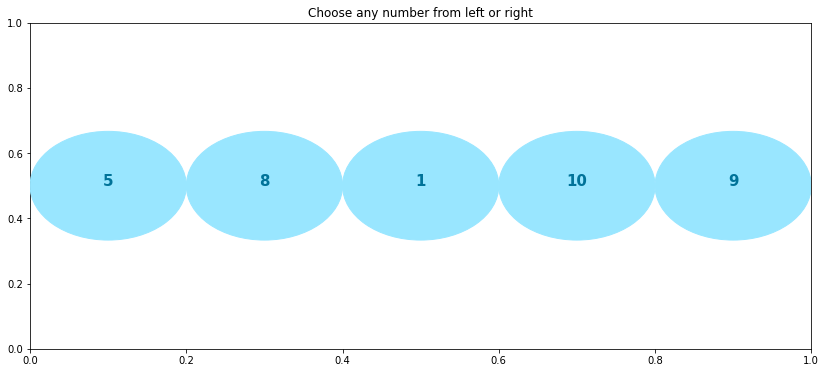

select a number from left or right: l


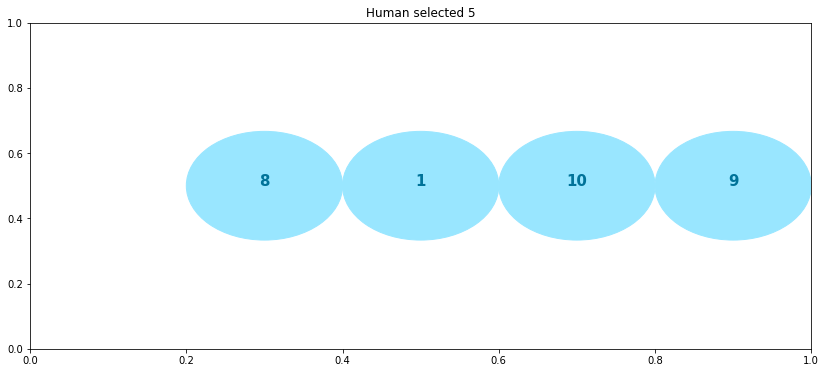

AI is taking it's time...


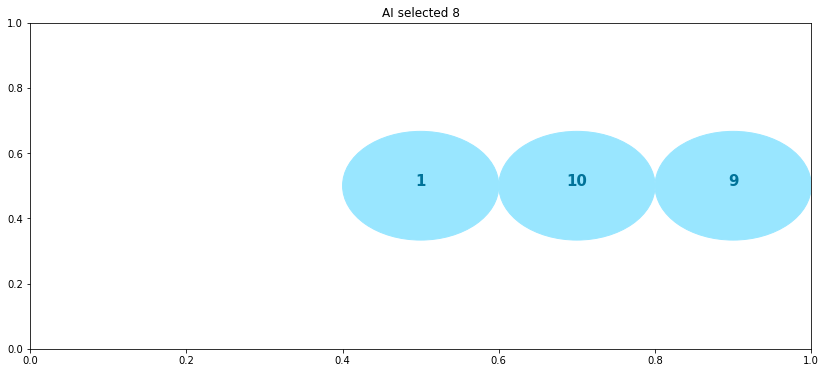

select a number from left or right: r


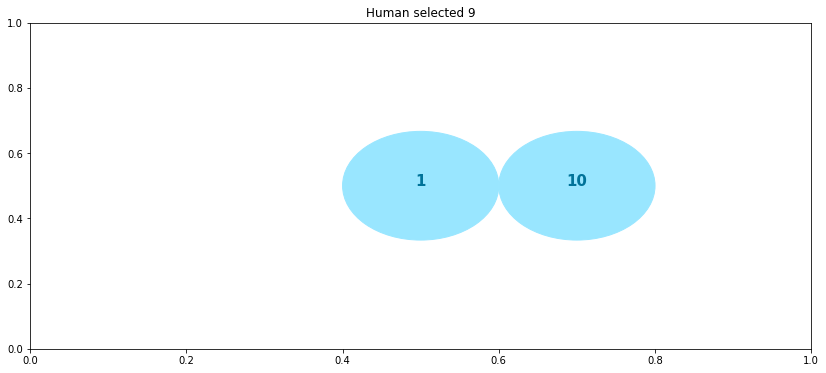

AI is taking it's time...


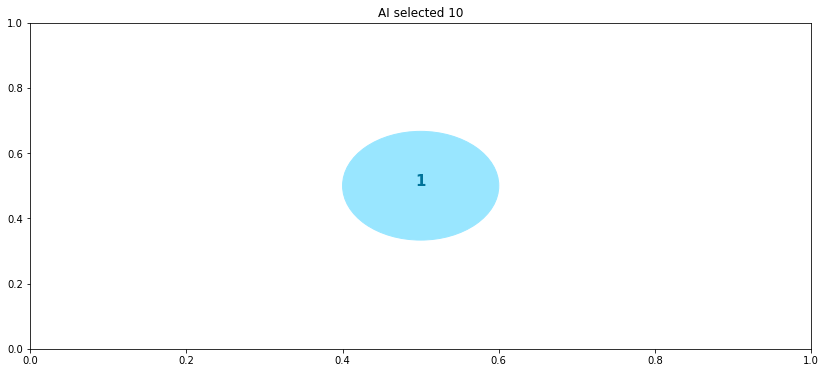

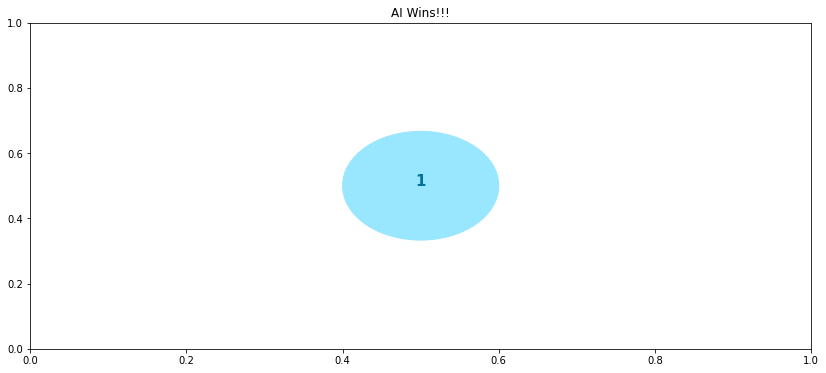

In [22]:
import matplotlib.pyplot as plt
import random
from copy import copy
import time


class GUI:
    def __init__(self, arr):
        self.arr = arr
        self.length = len(arr)
        self.circles = []
        self.circle_position = []
        self.first_length = self.length
        x = 1
        for i in range(self.length):
            # color = '#{:06x}'.format(random.randrange(254**3))
            # print(color)
            color = "#99e6ff"
            circle = plt.Circle((x, 1), 1, color=color)
            self.circles.append(circle)
            self.circle_position.append(x)
            x += 2

    def plot(self, text):
        fig, ax = plt.subplots(figsize=(14, 6))
        ax = fig.add_subplot(111)
        for i in range(self.length):
            label = ax.annotate(str(self.arr[i]), xy=(
                self.circle_position[i], 1), fontsize=15, ha="center", color="#007399", fontweight='bold')
            new_c = copy(self.circles[i])
            ax.add_patch(new_c)
        ax.set_ylim(-2, 4)
        ax.set_xlim(0, self.first_length*2)
        right_side = ax.spines["right"]
        right_side.set_visible(False)
        ax.set_title(text)
        ax.axis("off")
        plt.show(block=False)

    def remove_circle(self, lr):
        if lr == 'l':
            self.circles.pop(0)
            self.circle_position.pop(0)
            self.arr.pop(0)
            self.length = self.length - 1

        elif lr == 'r':
            self.circles.pop(self.length - 1)
            self.circle_position.pop(self.length - 1)
            self.arr.pop(self.length - 1)
            self.length = self.length - 1


class Node:
    def __init__(self, key=None, left=None, right=None):
        self.key = key
        self.left = left
        self.right = right


def minimax(arr, depth=0, prev=0):
    first, last = arr[0], arr[-1]
    newNode = Node()
    # max player
    if depth % 2 == 0:
        temp = -1
        if first > prev:
            if len(arr) == 1:
                newNode.left = Node()
                newNode.key = 1
                temp = 1
            else:
                leftChild = minimax(arr[1:], depth+1, first)
                temp = max(temp, leftChild.key)
                newNode.left = leftChild
        if last > prev:
            if len(arr) == 1:
                newNode.right = Node()
                newNode.right = 1
                temp = 1
            else:
                rightChild = minimax(arr[:-1], depth+1, last)
                temp = max(temp, rightChild.key)
                newNode.right = rightChild
        newNode.key = temp
        return newNode
    # min player
    if depth % 2 == 1:
        temp = 1
        if first > prev:
            if len(arr) == 1:
                newNode.left = Node()
                newNode.key = -1
                temp = -1
            else:
                leftChild = minimax(arr[1:], depth+1, first)
                temp = min(temp, leftChild.key)
                newNode.left = leftChild
        if last > prev:
            if len(arr) == 1:
                newNode.right = Node()
                newNode.key = -1
                temp = -1
            else:
                rightChild = minimax(arr[:-1], depth+1, last)
                temp = min(temp, rightChild.key)
                newNode.right = rightChild
        newNode.key = temp
        return newNode


def gamePlay(arr, node, ui, depth=0, prev=0):
    # if len(arr) == 1:
    #     return node.key
    first, last = arr[0], arr[-1]
    # human's turn
    if depth % 2 == 0:
        if prev == 0:
            ui.plot("Choose any number from left or right")
        else:
            ui.plot(f"AI selected {prev}")
        if prev >= first and prev >= last:
            ui.plot("AI Wins!!!")
            return -1

        newArr, last_selected, side = selectOption(arr, prev, ui)

        if len(newArr):
            if side == 'left':
                return gamePlay(newArr, node.left, ui, depth + 1, last_selected)
            elif side == 'right':
                return gamePlay(newArr, node.right, ui, depth + 1, last_selected)
    # AI's turn
    if depth % 2 == 1:
        ui.plot(f"Human selected {prev}")
        print("AI is taking it's time...")
        time.sleep(2)
        if first > prev and node.left is not None and node.left.key == -1:
            ui.remove_circle('l')
            return gamePlay(arr[1:], node.left, ui, depth+1, first)
        elif last > prev and node.right is not None and node.right.key == -1:
            ui.remove_circle('r')
            return gamePlay(arr[:-1], node.right, ui, depth+1, last)
        else:
            if first > prev and node.left is not None:
                ui.remove_circle('l')
                return gamePlay(arr[1:], node.left, ui, depth+1, first)
            elif last > prev and node.right is not None:
                ui.remove_circle('r')
                return gamePlay(arr[:-1], node.right, ui, depth+1, last)
            else:
                ui.plot("Human Wins!!!")
                return 1


def selectOption(arr, last_selected, ui):
    new_arr = []
    new_selected = 0
    side = 'x'
    # ui.plot()
#     print("option selection arr ", arr)
#     print("last selected number ", last_selected)
    selectFormLeftOrRight = input('select a number from left or right: ')
    if selectFormLeftOrRight == 'l':
        if arr[0] > last_selected:
            new_arr = arr[1:]
            new_selected = arr[0]
            side = 'left'
            ui.remove_circle(selectFormLeftOrRight)
        else:
            print('invalid selection')
            return selectOption(arr, last_selected, ui)
    elif selectFormLeftOrRight == 'r':
        if arr[-1] > last_selected:
            new_arr = arr[:-1]
            new_selected = arr[-1]
            side = 'right'
            ui.remove_circle(selectFormLeftOrRight)
        else:
            print('invalid selection')
            return selectOption(arr, last_selected, ui)
    else:
        print('invalid selection')
        return selectOption(arr, last_selected, ui)
    return new_arr, new_selected, side


tnc = 0
while True:
    x = int(input('Enter the number of balls (atleast 3): '))
    if x >= 3:
        tnc = x
        break

left = []
middle = []
right = []


middle = random.sample(range(10, 25), 2)
tnc -= 2

left = random.sample(range(1, 12), min(tnc, 3))
left.sort()
tnc -= min(tnc, 3)

right = random.sample(range(8, 20), tnc)
right.sort(reverse=True)

arr = []
arr.extend(left)
arr.extend(middle)
arr.extend(right)


arr = [5, 8, 1, 10, 9]

print(arr)

# arr = [2,5,10,23,15,9]


ui = GUI(arr)
# gt = gameTree(arr, 0)
# ans = minimax(arr, gt)
# play = gamePlay(arr, gt, ui)

gt = minimax(arr)
play = gamePlay(arr, gt, ui)